# Homework 3

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Problem 1:

This problem deals with the polarization of a $BEC(p)$ channel up to depth 3:

## Part 1:
Compute the capacities of 8 transformed channels $\{W^{+++}, W^{++−}, ..., W^{-−−}\}$ as a function of $p$.


In [1]:
import sympy
from sympy import Symbol, pprint

def p_min(p):
    return 2 * p - p ** 2

def p_plus(p):
    return p **2

p = Symbol('p')

current_level_probs = [p]

target_depth  = 3


channel_names = [
    "W^{---}", "W^{--+}", "W^{-+-}" , "W^{-++}",
    "W^{+--}", "W^{+-+}", "W^{++-}", "W^{+++}"
]

for d in range(target_depth):
    
    # This list will hold the probabilities for the *next* level
    next_level_probs = []
    
    # Iterate over all probabilities in the current level
    for prob in current_level_probs:
        
        # For each channel, it splits into two:
        # 1. A 'bad' channel (using p_min)
        next_level_probs.append(p_min(prob))
        
        # 2. A 'good' channel (using p_plus)
        next_level_probs.append(p_plus(prob))
    
    current_level_probs = next_level_probs

capacities = [1 - prob for prob in current_level_probs]
for i in range(len(capacities)):
    name = channel_names[i]
    # We simplify the expression for cleaner output
    cap_simplified = sympy.simplify(capacities[i])
    # pprint gives a much nicer multi-line output
    display(Symbol(name))
    display(cap_simplified)
    print("\n" + "-"*40 + "\n")

W^{---}

2*p**2*(p - 2)**2 + p**2*(p*(p - 2)**2 + 2*p - 4)**2 + 4*p**2 - 8*p + 1


----------------------------------------



W^{--+}

-p**2*(p*(p - 2)**2 + 2*p - 4)**2 + 1


----------------------------------------



W^{-+-}

p**4*(p - 2)**4 - 2*p**2*(p - 2)**2 + 1


----------------------------------------



W^{-++}

-p**4*(p - 2)**4 + 1


----------------------------------------



W^{+--}

p**8 - 4*p**6 + 6*p**4 - 4*p**2 + 1


----------------------------------------



W^{+-+}

-p**4*(p**2 - 2)**2 + 1


----------------------------------------



W^{++-}

p**8 - 2*p**4 + 1


----------------------------------------



W^{+++}

1 - p**8


----------------------------------------



## Part 2:
For each $n = 2^k$, let $F_n$ be the empirical distribution function of the transformed channel capacities,i.e., for x ∈ [0, 1], $F_n(x) :=$ fraction of transformed channels with capacity less than or equal to $x$.What does the polarization theorem say about the function Fn as n → ∞? Compute $F_n$ numerically for large $n$ to see the polarization effect, and plot $F_n$ for several n to demonstrate the effect.


Capacities for n=2:
[0.25, 0.75]

Capacities for n=4:
[0.0625, 0.4375, 0.5625, 0.9375]

Capacities for n=8:
[0.00391, 0.12109, 0.19141, 0.31641, 0.68359, 0.80859, 0.87891, 0.99609]


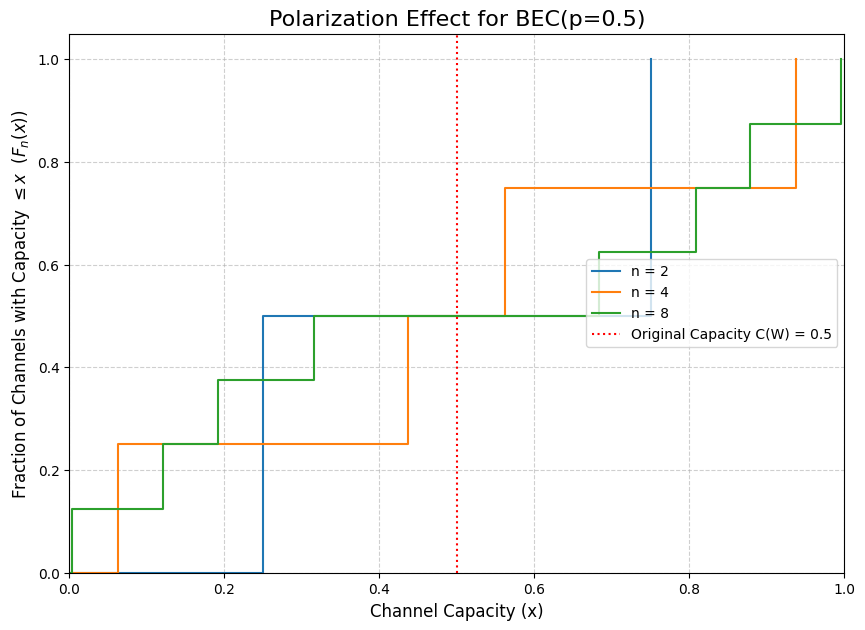

In [6]:
import matplotlib.pyplot as plt

# --- Setup ---
p_initial = 0.5  # As specified in the problem, for BEC(0.5)
max_depth = 3    # We want to plot for n=2, 4, 8 (depths 1, 2, 3)

# Create a figure for our plot
plt.figure(figsize=(10, 7))

# --- Iterative Calculation and Plotting ---

# We loop for each depth we want to plot (1, 2, and 3)
for depth in range(1, max_depth + 1):
    
    n = 2**depth  # Current N
    
    current_level_probs = [p_initial]

    for _ in range(depth):
        next_level_probs = []
        for prob in current_level_probs:
            next_level_probs.append(p_min(prob))
            next_level_probs.append(p_plus(prob))
        current_level_probs = next_level_probs
        
    capacities = [1 - prob for prob in current_level_probs]
    
    sorted_capacities = sorted(capacities)
    

    # x-values are the capacities, starting at 0
    x_values = [0] + sorted_capacities
    
    # y-values are the cumulative probabilities (0, 1/n, 2/n, ..., n/n)
    y_values = [0] + [(i + 1) / n for i in range(n)]
    
    # 4. Plot this CDF
    plt.step(x_values, y_values, where='post', label=f'n = {n}')
    
    print(f"\nCapacities for n={n}:")
    print([round(c, 5) for c in sorted_capacities])

# --- Final Plot Formatting ---------------------------------------------
plt.title(f'Polarization Effect for BEC(p={p_initial})', fontsize=16)
plt.xlabel('Channel Capacity (x)', fontsize=12)
plt.ylabel('Fraction of Channels with Capacity $\\leq x$  ($F_n(x)$)', fontsize=12)
plt.legend(loc='center right')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xlim(0, 1)
plt.ylim(0, 1.05)

plt.axvline(x=(1-p_initial), color='red', linestyle=':', 
            label=f'Original Capacity C(W) = {1-p_initial}')
plt.legend(loc='center right') # Call legend again to include axvline

plt.show()

# Problem 2:
In class we saw the polarization of a BEC channel. However, the polarization effect holds for any symmetric
binary input channel. To demonstrate this, consider a Binary Symmetric Channel (BSC) with cross over
probability $p$.

## Part 1:

Derive the polarization up to depth 1, i.e., compute the capacity of the transformed channels $W^{−}$ and
$W^{+}$.

Observe that, by definition:

$$
T = \begin{bmatrix}
1-p & p \\
p & 1-p
\end{bmatrix}
$$

We also know that capacity of a $BSC(p)$ is achieved when the steady state distribution is uniform (i.e. $P(0)= P(1) = 0.5$). For a BSC, the capacity is:

$$
C(W) = 1- H_2(p)
$$

Now, let 

$$ 
X_1 = U_1 \oplus U_2 
\newline
X_2 = U_2 
$$

Then we have:

$$
p^-  = 2p(1-p)
\newline
\newline
p^+ = \frac{p^2}{(1-p)^2+p^2}
$$
Which gives:
$$
C(W^-)=I(U_1 ; Y_1, Y_2)= 1-H_2(2p(1-p))
\newline
C(W^+)=I(U_2 ; Y_1, Y_2| U_1) = 2(1-H_2(p))
$$






<!-- $$
C(W^-) + C(W^+) =I(U_1 ; Y_1, Y_2) + I(U_2 ; Y_1, Y_2| U_1)
\newline
C(W^-) + C(W^+) =  I(U_1, U_2 ; Y_1, Y_2) \quad\quad  \text{(By chain rule of $I$)}
$$ 

Therefore:

$$
C(W^-) + C(W^+) = 2C(W)= 2(1-H_2(p))
$$

**$C(W^+)$**:

$$
C(W^+) = \sum_{k\in \{0, 1\}} P(U_1 = k)I(U_2; Y_1, Y_2 | U_1 = k)
\newline
C(W^+) = I(U_2; Y_1, Y_2 | U_1 = 0) \quad \text{(By symmetry)}
$$ -->










## Part 2:

What is the capacity of the 8 transformed channels $\{W^{+++}, W^{++−}, ..., W^{-−−}\}$ in this setting as a
function of $p$? (You should use a computer here to compute them). Compare this to a $BEC(p)$ channel
polarization.

In [31]:
def p_min_bsc(p):
    new_sym = f'{p}^ -'
    return 2*p*(1-p)

def p_plus_bsc(p):
    new_sym = f'{p}^ +'
    numerator = p ** 2
    denom = (1-p) ** 2 + p** 2
    return numerator / denom

p = Symbol('p')


p_dict = {'0': {p: p}}

target_depth = 3
current_level_probs = [p]

target_depth  = 3


channel_names = [
    "W^{---}", "W^{--+}", "W^{-+-}" , "W^{-++}",
    "W^{+--}", "W^{+-+}", "W^{++-}", "W^{+++}"
]

for d in range(target_depth):
    
    # This list will hold the probabilities for the *next* level
    next_level_probs = []
    
    # Iterate over all probabilities in the current level
    for prob in current_level_probs:
        
        # For each channel, it splits into two:
        # 1. A 'bad' channel (using p_min)
        next_level_probs.append(p_min_bsc(prob))
        
        # 2. A 'good' channel (using p_plus)
        next_level_probs.append(p_plus_bsc(prob))
    
    current_level_probs = next_level_probs

capacities = [1 - prob for prob in current_level_probs]
for i in range(len(capacities)):
    name = channel_names[i]
    # We simplify the expression for cleaner output
    cap_simplified = sympy.simplify(capacities[i])
    # pprint gives a much nicer multi-line output
    display(Symbol(name))
    display(cap_simplified)
    print("\n" + "-"*40 + "\n")


W^{---}

8*p*(p - 1)*(2*p*(p - 1) + 1)*(4*p*(p - 1)*(2*p*(p - 1) + 1) + 1) + 1


----------------------------------------



W^{--+}

(4*p*(p - 1)*(2*p*(p - 1) + 1) + 1)**2/(16*p**2*(p - 1)**2*(2*p*(p - 1) + 1)**2 + (4*p*(p - 1)*(2*p*(p - 1) + 1) + 1)**2)


----------------------------------------



W^{-+-}

(32*p**8 - 128*p**7 + 224*p**6 - 224*p**5 + 152*p**4 - 80*p**3 + 32*p**2 - 8*p + 1)/(64*p**8 - 256*p**7 + 448*p**6 - 448*p**5 + 288*p**4 - 128*p**3 + 40*p**2 - 8*p + 1)


----------------------------------------



W^{-++}

(16*p**8 - 64*p**7 + 128*p**6 - 160*p**5 + 136*p**4 - 80*p**3 + 32*p**2 - 8*p + 1)/(32*p**8 - 128*p**7 + 224*p**6 - 224*p**5 + 152*p**4 - 80*p**3 + 32*p**2 - 8*p + 1)


----------------------------------------



W^{+--}

(4*p**2*(p - 1)**2*(2*p**2*(1 - p)**2 - (p**2 + (1 - p)**2)*(p**2 + (p - 1)**2)) + (p**2 + (1 - p)**2)*(p**2 + (p - 1)**2)**3)/((p**2 + (1 - p)**2)*(p**2 + (p - 1)**2)**3)


----------------------------------------



W^{+-+}

(4*p**8 - 16*p**7 + 40*p**6 - 64*p**5 + 72*p**4 - 56*p**3 + 28*p**2 - 8*p + 1)/(8*p**8 - 32*p**7 + 64*p**6 - 80*p**5 + 76*p**4 - 56*p**3 + 28*p**2 - 8*p + 1)


----------------------------------------



W^{++-}

-2*p**4*(p - 1)**4/(p**4 + (p - 1)**4)**2 + 1


----------------------------------------



W^{+++}

(p - 1)**8/(p**8 + (p - 1)**8)


----------------------------------------



# Problem 3:

This problem shows an alternative proof of polarization for the BEC Channel. Let the original BEC have
erasure parameter $p$. At stage $k$, there are $2^k$ effective BEC’s. Let $p_{k,1}, p_{k,2}, ..., p_{k,2^k}$  be the erasure parameters
of these channels. (For example, for $k = 1$ the two BEC’s have erasure parameters $p^2$ and $1 − (1 − p)^2$.



### A) Compute $ \frac{1}{2^k}\sum_ip_{k,i}$

Since every step is a recursion of the first. Lets consider when $k= 1$

$$
\frac{1}{2^1}\sum_i p_{1,i} = \frac{p^2 + 1 -(1-p)^2}{2} = \frac{p^2 + 1 -1 +2p- p^2}{2} = \frac{2p}{2} = p
$$

Since at every step the average is the probability of the previous step we know that 

$$
\frac{1}{2^k}\sum_i p_{k,i} = p 
$$

### B) 
Define the second moment of the empirical distribution of the erasure parameters to be

$$
v_ k = \frac{1}{2^k}\sum_i^{2^k} p_{k,i}^2 
$$

Find a recursive formula for vk in the following form:

$$
v_{k+1} = v_k + \frac{1}{2^k}\sum_i^{2^k} A_i^2 
$$

where $A_i$ is some function of $p_{k,i}$